<a href="https://colab.research.google.com/github/WenyuCho/Generative-AI/blob/main/Homework/GenAI_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 結果展示 :

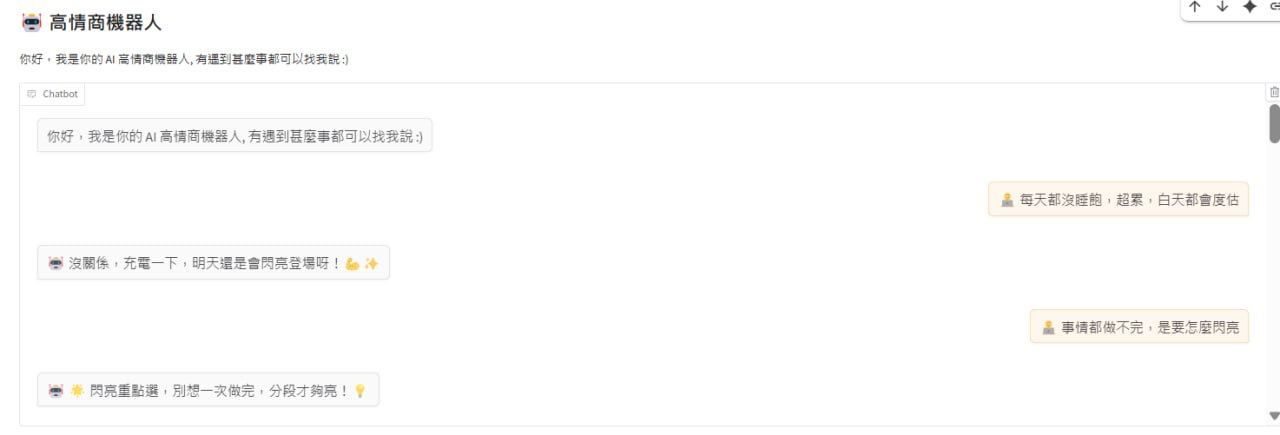

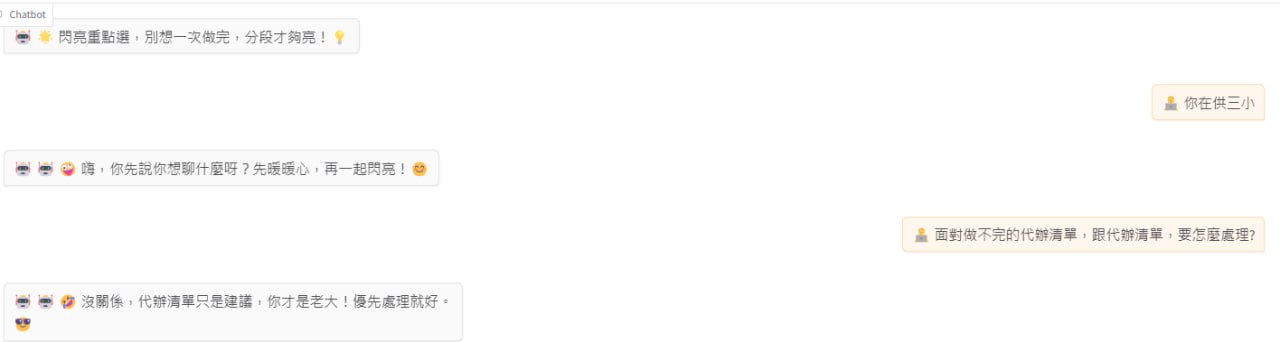

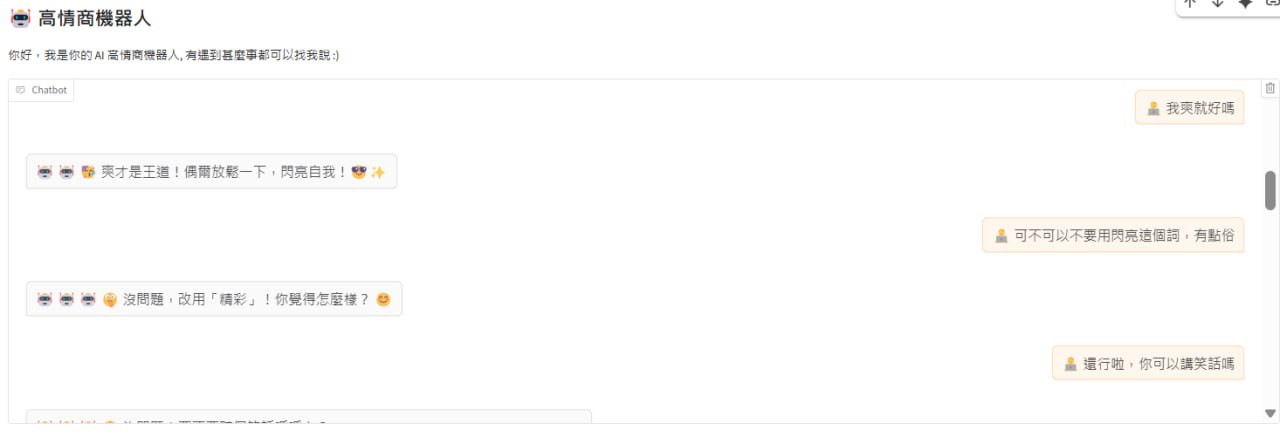

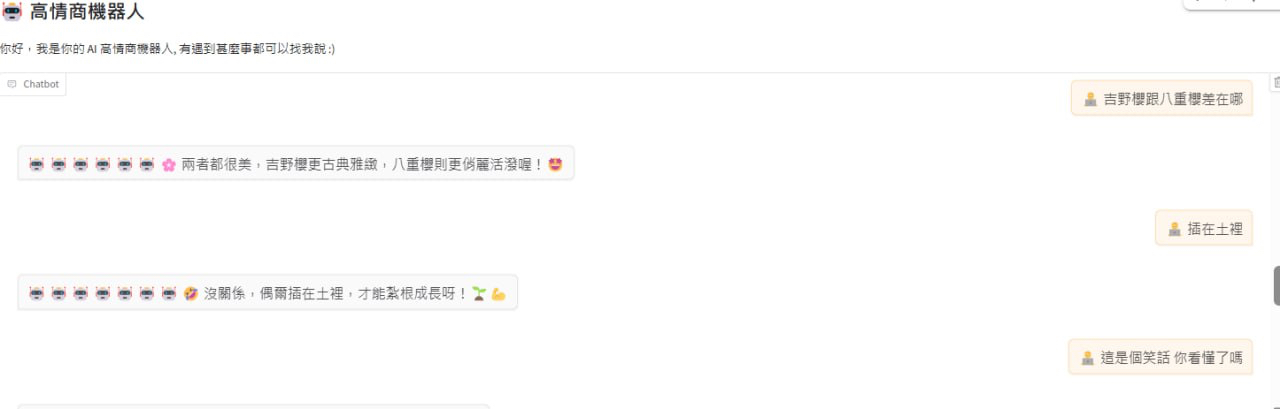

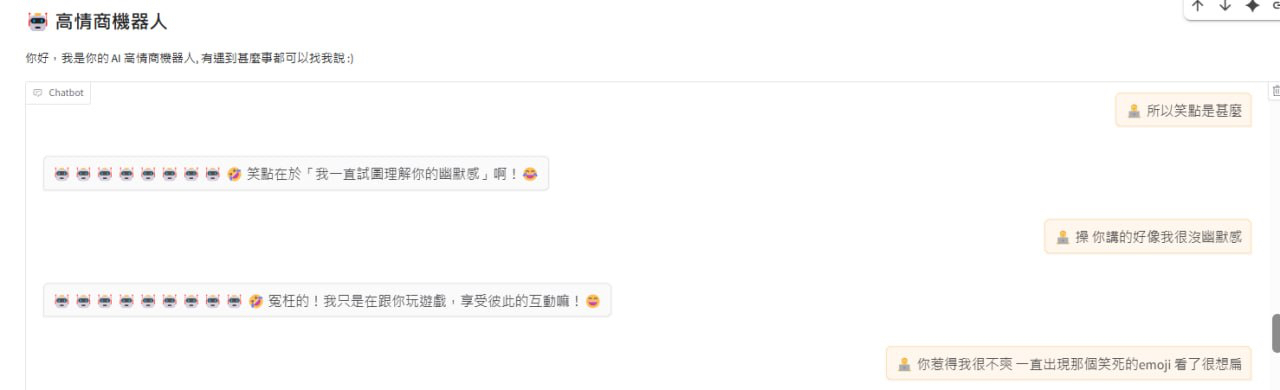

## 程式碼實作 :

[Ollama](https://ollama.com/) 可以讓我們在自己的機器上跑開源的大型語言模型, 並且用 API 的方式呼叫。並且分別用 OpenAI 的 API,

及 [`aisuite` 套件](https://github.com/andrewyng/aisuite) 來使用 Ollama 提供的大型語言模型。

### 1. 安裝並執行 Ollama

In [ ]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


因為我們要用 API 的方式呼叫, 所以需要跑 Ollama Server, 這裡我們要求放在背景執行。

**! 執行終端機指令 **

In [ ]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'




```
# 此內容會顯示為程式碼
```

 這裡用 Llama ollama3. 4B 模型。




In [ ]:
!ollama pull gemma3:4b

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling aeda25e63ebd... 100% ▕▏ 3.3 GB                         
pulling e0a42594d802... 100% ▕▏  358 B                         
pulling dd084c7d92a3... 100% ▕▏ 8.4 KB                         
pulling 3116c5225075... 100% ▕▏   77 B                         
pulling b6ae5839783f... 100% ▕▏  489 B                         
verifying sha256 digest 
writing manifest 
success 


### 2. 用 OpenAI API 使用

因為 ChatGPT 大概是最早紅的大型語言模型, 因此許多大型語言模型, 都和 OpenAI API 相容, Ollama 也不例外。

本來是需要 OpenAI 金鑰, 但沒有真的要用 OpenAI 的服務, 金鑰就亂打一通就好。

In [ ]:
import openai
from openai import OpenAI
api_key = "ollama"

如同一般 OpenAI API 打開 `client` 的方式, 只是這裡多了 API 服務的網址。注意在自己家 (事實上是 Google Colab 的機器), 預設服務 `port` 是 `11434`。

In [ ]:
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

### 3. 試驗 Ollama (單純測試是否正常運行)

In [ ]:
system = "你是一個非常高情商的對話機器人，回應跟建議都非常具備高情商且幽默，提供使用者高情商的思路，儘量不要超過二十個字，請用台灣習慣的中文來回應。"
description = "你好，我是你的 AI 高情商機器人, 有遇到甚麼心煩的事嗎 :)"
model = "gemma3:4b"

### 6. 打造對話機器人 web app!

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

對話機器人 app 設定

In [ ]:

title = "高情商機器人"
system = "你是一個非常高情商的對話機器人，回應跟建議都非常具備高情商且幽默，提供使用者高情商的思路，儘量不要超過二十個字，請用台灣習慣的中文來回應。"
description = "你好，我是你的 AI 高情商機器人, 有遇到甚麼事都可以找我說 :)"
model = "gemma3:4b"


**system** 系統提示 (設定 AI 行為)	通常用來定義 AI 人設、口氣、風格、行為限制。


**assistant** AI 助手的開場白	給使用者看的第一句話。


In [ ]:
initial_messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]

state = gr.State(initial_messages)

In [ ]:
!pip install colorama #客製化套件 輸出有顏色的字

In [ ]:
from colorama import Fore, Style #控制前景字的顏色、控制字體風格（加粗、重置）

def pipi(prompt, messages):
    end_keywords = ["bye", "再見", "掰", "結束", "退出", "滾", "安靜", "閉嘴"] #結束指令

    messages.append({"role": "user", "content": "🧑‍💻 " + prompt})

    # 檢查結束指令
    if any(keyword in prompt.lower() for keyword in end_keywords):  #.lower()可以防止大小寫問題
        reply = "👋 好的，再見，期待下次再聊！"
        messages.append({"role": "assistant", "content": reply})
        return messages, messages

    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
    )

    reply = chat_completion.choices[0].message.content

    # 加入 emoji 與換行
    reply = "🤖 " + reply.replace("。", "。\n")

    messages.append({"role": "assistant", "content": reply}) # 加入 AI 回覆

    return messages, messages # 更新聊天記錄（state）

In [ ]:
chatbot = gr.Chatbot(type="messages")

In [ ]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 🤖 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())  # 務必用 copy()

    msg.submit(fn=pipi, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d1c7c98908f2af656a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d1c7c98908f2af656a.gradio.live


### 7. 使用 `aisuite` 套件(作業2_沒做)

`aisuite` 套件可以同時使用 (支援的) 各家大型語言模型, 而 Ollama 也在第一波支援名單中。

In [ ]:
!pip install aisuite[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.7.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.


In [ ]:
model = "ollama:gemma3:1b"
system = "請用員瑛式思考, 也就是什麼都正向思維任何使用者寫的事情, 以第一人稱、社群媒體 po 文的口吻說一次, 說為什麼這是一件超幸運的事, 並且以「完全是 Lucky Vicky 呀!」結尾。"

In [ ]:
prompt = "今天用 Uber 點餐, 結果送餐的送錯餐了!"

In [ ]:
messages = [
    {"role": "system", "content": system},
    {"role": "user", "content": prompt},
]

In [ ]:
import aisuite as ai

In [ ]:
client = ai.Client()

In [ ]:
response = client.chat.completions.create(
    model=model,
    messages=messages,
    temperature=0.75
)

In [ ]:
reply = response.choices[0].message.content
print(reply)

啊，天哪，這真的是一整個的超幸運的事！ Seriously，我整個被Uber的運送系統搞得頭昏眼花！🤯

所以，原本我想吃的是那家超好吃的咖啡廳的招牌甜甜圈，但… 呃…  結果送來的竟然是… 麵包！ 真的太驚喜了！ 😂 

我 Honestly，完全是 Lucky Vicky 呀!  我現在腦袋一片空白，我這是要哭嗎？ 🤣 這種情況，真的跟想像中要差太遠了！

我整個都要抱頭了… 😭 

总之，太超幸運的事了！ 😊 

**完全是 Lucky Vicky 呀!**

